# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


Display the data's first 5 rows

In [8]:

from matplotlib import pyplot
import pandas as pd
import numpy as np

path = './data/water_potability.csv'

df = pd.read_csv(path)

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Split the data into features and targets

In [9]:
# Handle missing values (for simplicity, we'll fill them with the mean of the column)
df = df.replace('?', np.nan).astype(float)
df = df.fillna(df.mean())


# Split the data into features and target
# make them numpy arrays
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

Split the data into train and test sets

In [10]:

# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# further split the train set into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)


print("Train shapes: ")
print(X_train.shape)
print(y_train.shape)

print("Test shapes: ")
print(X_test.shape)
print(y_test.shape)

print("Validation shapes: ")
print(X_val.shape)
print(y_val.shape)


Train shapes: 
(2096, 9)
(2096,)
Test shapes: 
(656, 9)
(656,)
Validation shapes: 
(524, 9)
(524,)


## Visualize our data

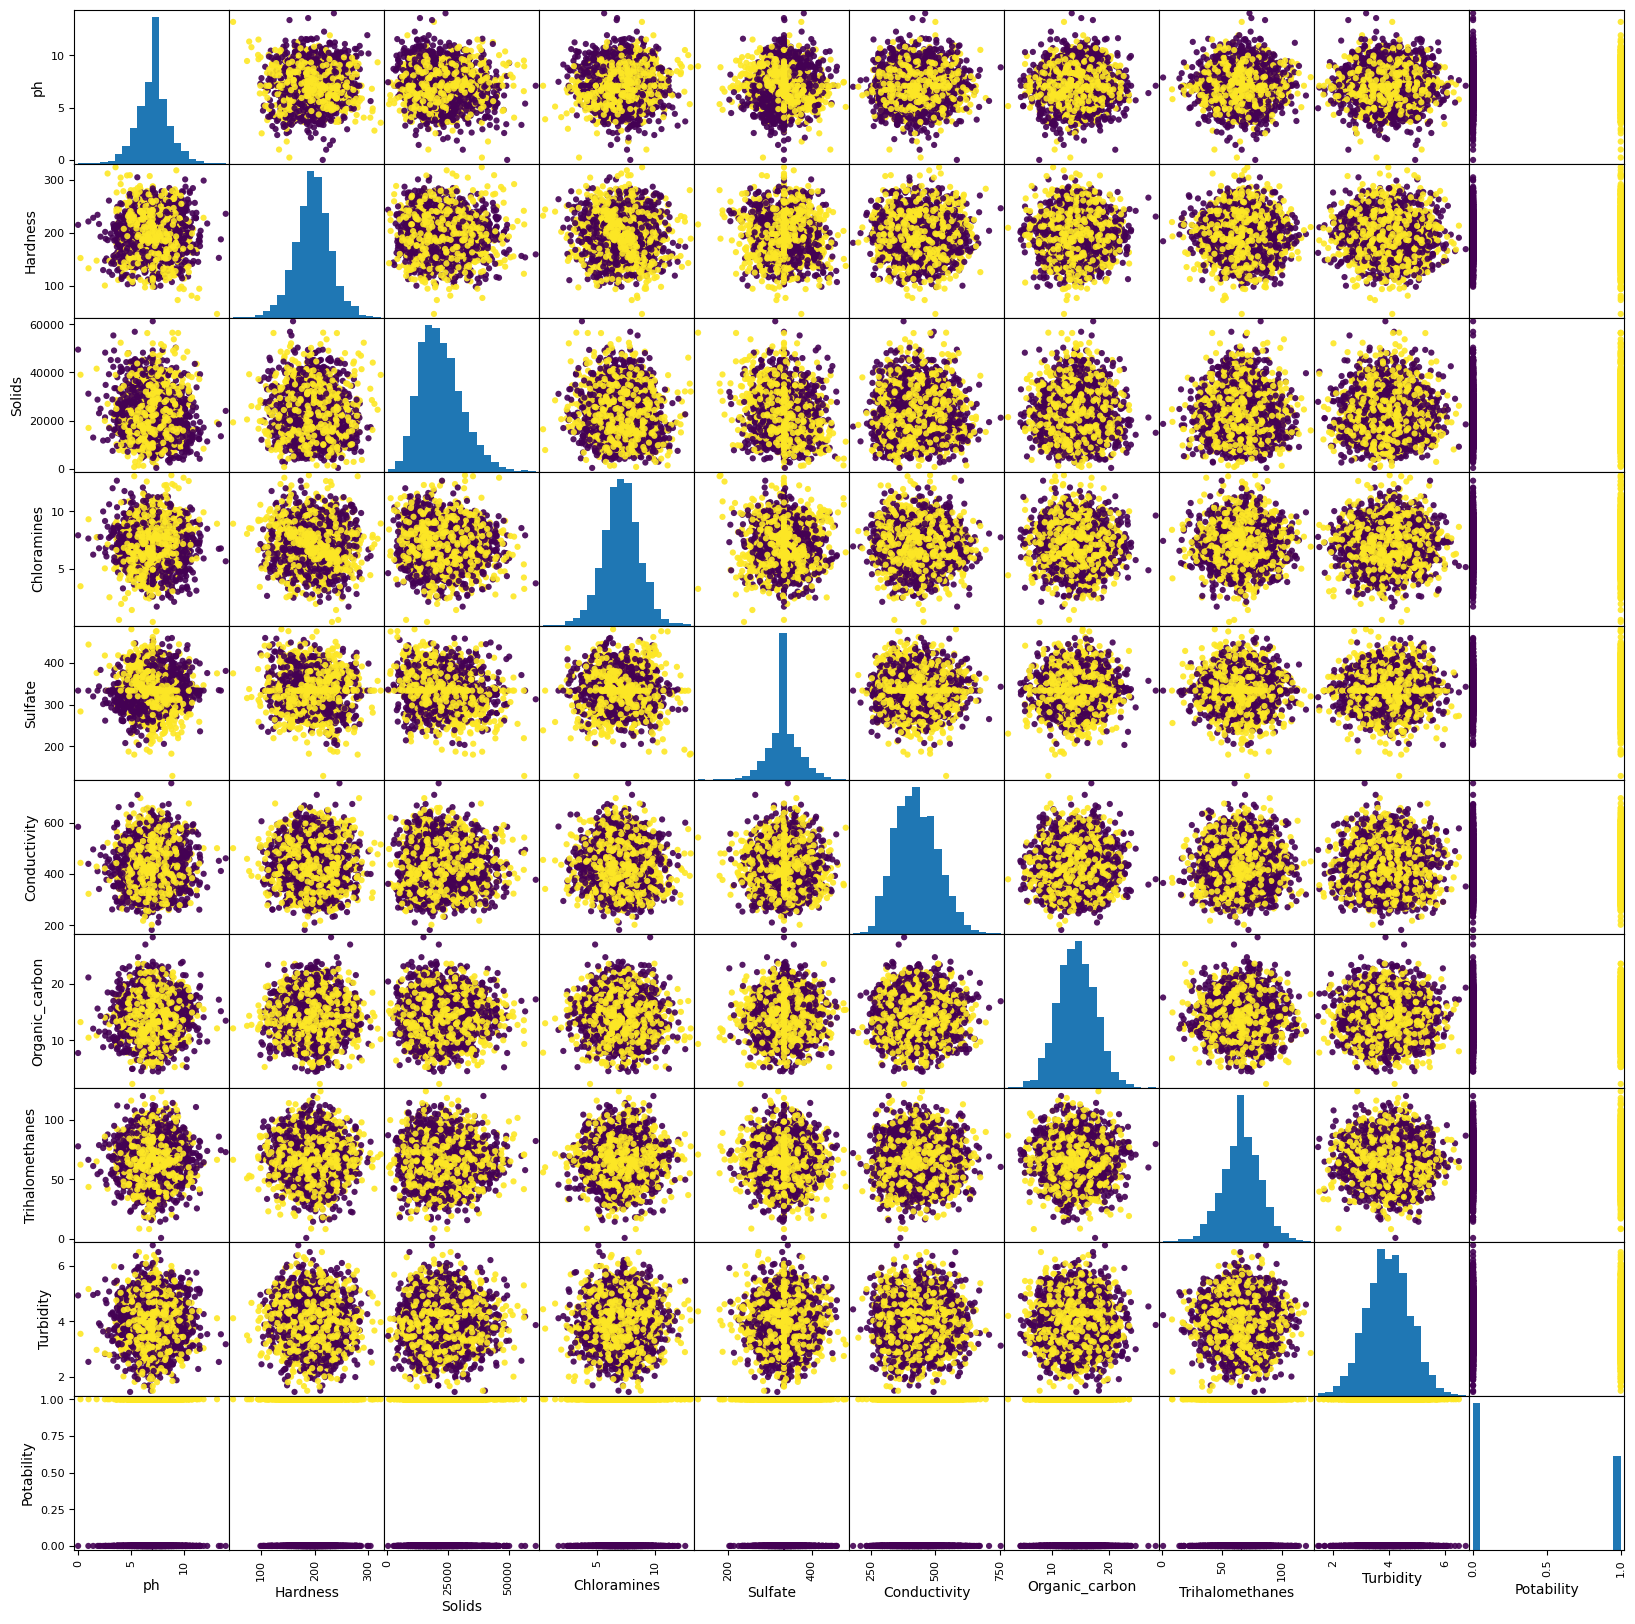

In [11]:
# data visualization
# scatter plot

grr = pd.plotting.scatter_matrix(df, c=y, figsize=(20,20), marker = 'o', hist_kwds={'bins': 20}, s=20, alpha=.9)

# Define the model

In [12]:
# import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(
    units = 128,
    activation = 'relu',
    input_dim = X_train.shape[1]
))

# Add the second hidden layer
model.add(Dense(
    units = 64,
    activation = 'relu',
))

# Add the output layer with 2 neurons
model.add(Dense(
    units = 1,
    activation = 'sigmoid'
))

# Compile the model
optimzer = Adam(learning_rate = 0.001)
model.compile(
    optimizer = optimzer,
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

# Start the training Process

In [13]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    epochs = 200,
    batch_size = 32,
    verbose = 1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

Epoch 1/200
66/66 [==============================] - 4s 19ms/step - loss: 0.2369 - accuracy: 0.6131 - val_loss: 0.4027 - val_accuracy: 0.5973
Epoch 2/200
66/66 [==============================] - 1s 10ms/step - loss: 0.2174 - accuracy: 0.6632 - val_loss: 0.4984 - val_accuracy: 0.4981
Epoch 3/200
66/66 [==============================] - 1s 10ms/step - loss: 0.2070 - accuracy: 0.6794 - val_loss: 0.5973 - val_accuracy: 0.4027
Epoch 4/200
66/66 [==============================] - 0s 7ms/step - loss: 0.2012 - accuracy: 0.6837 - val_loss: 0.5973 - val_accuracy: 0.4027
Epoch 5/200
66/66 [==============================] - 1s 9ms/step - loss: 0.1979 - accuracy: 0.6904 - val_loss: 0.5973 - val_accuracy: 0.4027
Epoch 6/200
66/66 [==============================] - 1s 10ms/step - loss: 0.1949 - accuracy: 0.7023 - val_loss: 0.5954 - val_accuracy: 0.4046
Epoch 7/200
66/66 [==============================] - 1s 11ms/step - loss: 0.1938 - accuracy: 0.6994 - val_loss: 0.5965 - val_accuracy: 0.4027
Epoch 8/

## Evaluate the model

In [14]:
# evaluate the model on the unseen data
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

21/21 [==============================] - 0s 11ms/step - loss: 0.3340 - accuracy: 0.6052
Test Loss:  0.3339911699295044
Test Accuracy:  0.605182945728302
